In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/alpaco/project/image_recognition

/content/drive/.shortcut-targets-by-id/1wsoYtPFk4Ia_qXoKCcoi51yEuHK6jzdT/image_recognition


In [ ]:

pwd

'/content/drive/.shortcut-targets-by-id/1wsoYtPFk4Ia_qXoKCcoi51yEuHK6jzdT/image_recognition'

In [ ]:
ls

data/  dataset_analysis.ipynb  js/  ra/  아이디어.txt


## 이미지 증강

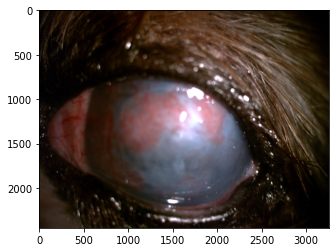

In [ ]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#cv2.imread는 이미지를 RGB가 아닌 BGR로 받아오기 때문에 바꿔 주어야함.
image = cv2.cvtColor(cv2.imread('./data/save_sample/img/D0_0d4fdd86-60a5-11ec-8402-0a7404972c70.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
#augmentation이 적용된 image들을 시각화 해주는 함수
def show_aug_image(image, generator, n_images=4):
	
    # ImageDataGenerator는 여러개의 image를 입력으로 받기 때문에 4차원으로 입력 해야함.
    image_batch = np.expand_dims(image, axis=0)
	
    # featurewise_center or featurewise_std_normalization or zca_whitening 가 True일때만 fit 해주어야함
    generator.fit(image_batch) 
    # flow로 image batch를 generator에 넣어주어야함.
    data_gen_iter = generator.flow(image_batch)

    fig, axs = plt.subplots(nrows=1, ncols=n_images, figsize=(24, 8))

    for i in range(n_images):
    	#generator에 batch size 만큼 augmentation 적용(매번 적용이 다름)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('int')
        axs[i].imshow(aug_image)

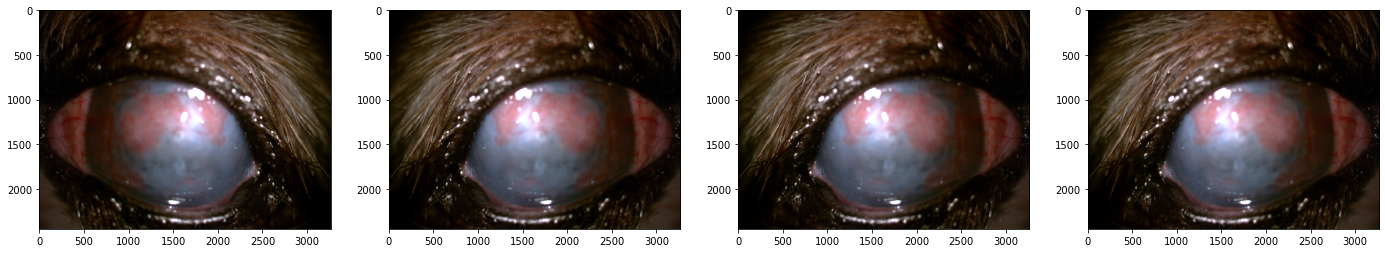

In [ ]:
data_generator = ImageDataGenerator(horizontal_flip=True)
show_aug_image(image, data_generator, n_images=4)

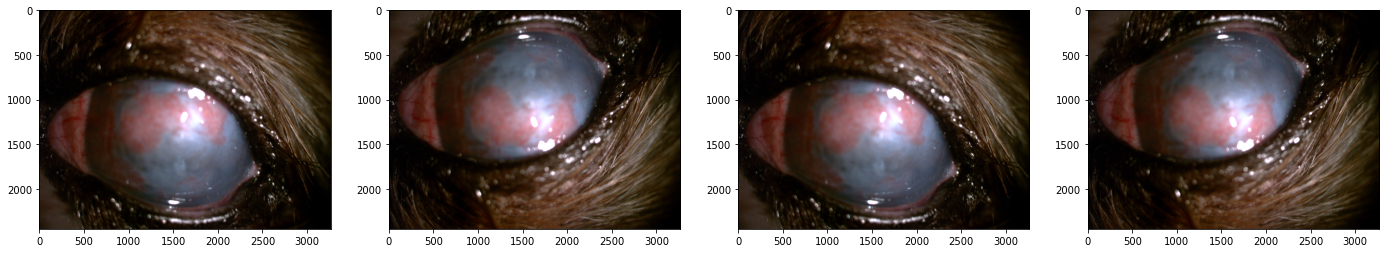

In [ ]:
data_generator = ImageDataGenerator(vertical_flip=True)
show_aug_image(image, data_generator, n_images=4)

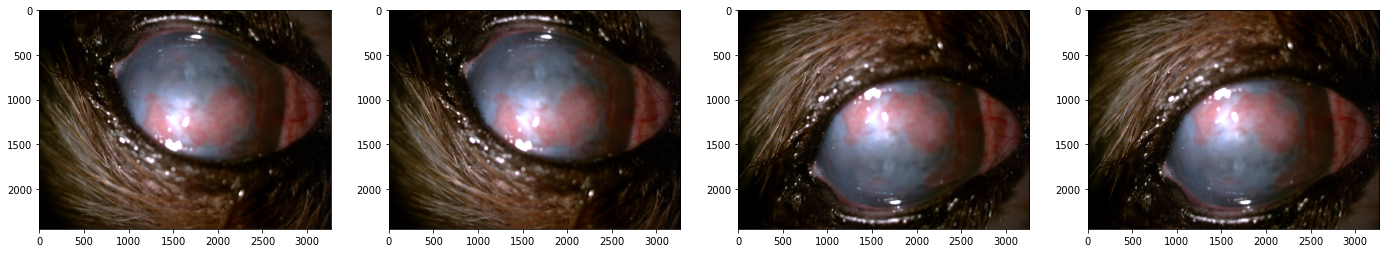

In [ ]:
data_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
show_aug_image(image, data_generator, n_images=4)

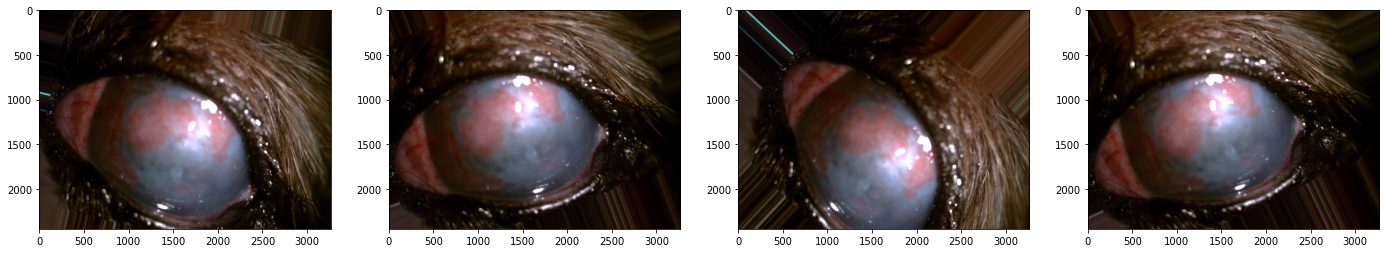

In [ ]:
data_generator = ImageDataGenerator(rotation_range=45)
show_aug_image(image, data_generator, n_images=4)

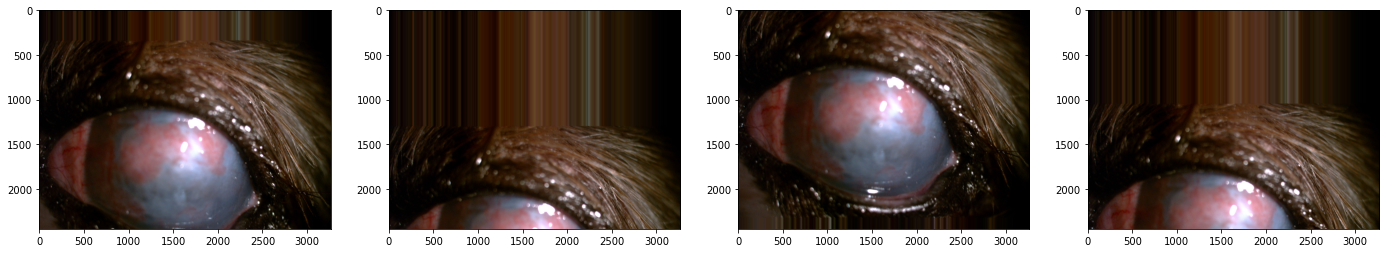

In [ ]:
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='nearest')
show_aug_image(image, data_generator, n_images=4)

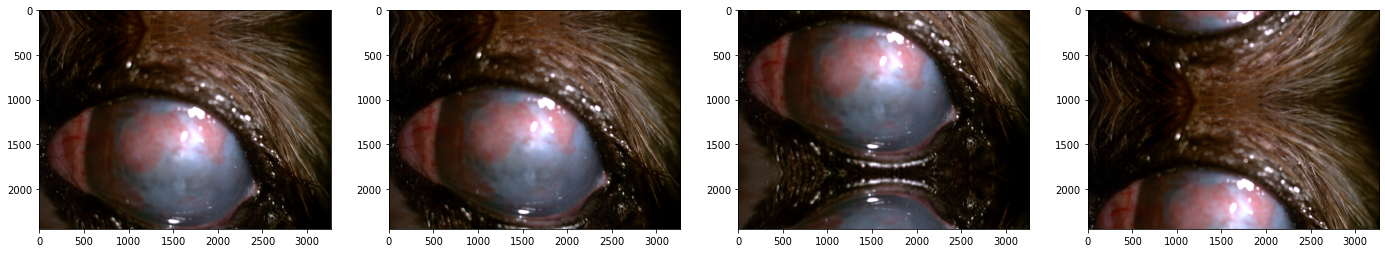

In [ ]:
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='reflect')
show_aug_image(image, data_generator, n_images=4)

In [ ]:
pwd

'/content/drive/.shortcut-targets-by-id/1wsoYtPFk4Ia_qXoKCcoi51yEuHK6jzdT/image_recognition'

## ImageDataGenerator



- rescale: 이미지의 픽셀값 범위를 0에서 1 사이의 값으로 정규화합니다.
- shear_range: 전단변환(shear transformation)을 적용합니다. 전단변환은 이미지를 수평 또는 수직 방향으로 이동시키는 변환이며, 이동 시에 생기는 빈 공간을 채우기 위해 이미지를 변형시킵니다.
- rotation_range: 이미지를 임의의 각도로 회전시킵니다. 각도 범위는 0에서 180도까지입니다.
- width_shift_range와 height_shift_range: 이미지를 수평 또는 수직 방향으로 이동시킵니다. 이동 거리는 전체 이미지 크기에 대한 비율로 지정합니다.
- zoom_range: 이미지를 임의의 확대/축소 비율로 변환합니다.
horizontal_flip과 vertical_flip: 이미지를 수평 또는 수직 방향으로 뒤집습니다.
- validation_split: 검증 데이터셋의 비율을 지정합니다.
- horizontal_flip : 가로로 뒤집기
- vertical_flip : 세로로 뒤집기

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


# 이미지 데이터 제너레이터 생성
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
    
))

# 이미지 데이터를 불러오기 위한 제너레이터 생성
train_generator = train_datagen.flow_from_directory(
    directory= '경로' ,
    target_size=(224, 224),
    batch_size=32,
    shuffle = True,
    class_mode='sparse')

# 학습 데이터와 검증 데이터로 나누기
train_images, test_images, train_labels, test_labels = train_test_split(
    train_generator[0][0], train_generator[0][1], test_size=0.2)

# 모델 학습
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


#예전에 했던 것

In [ ]:
import tensorflow as tf
from tensorflow import keras
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                                          validation_split=0.2)
# 학습 데이터셋 경로
train_dir = '/path/to/training/dataset'

# 검증 데이터셋 경로
val_dir = '/path/to/validation/dataset'


train_set = img_gen.flow_from_directory(directory="./data/save_sample/img/",
                                        target_size = (480,480),
                                        class_mode='categorical',
                                        subset='training',
                                        shuffle = True,
                                        batch_size = 32)

Found 6 images belonging to 3 classes.


In [ ]:
valid_set = img_gen.flow_from_directory(directory="./data/save_sample/img/",
                                        target_size = (4030,4030),
                                        class_mode='categorical',
                                        subset='validation',
                                        shuffle = False, 
                                        batch_size = 32)#검증데이터셋은 셔플하지 않음

Found 4 images belonging to 3 classes.


In [ ]:
image_data = img_gen.flow_from_directory(directory="./data/save_sample/img/",target_size = (4030,4030))

Found 10 images belonging to 3 classes.


- 전체 몇갠지 확인

- 구성된 train set의 내부 이미지 하나를 한 번 확인해 보겠습니다

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

def get_class_string_from_index(index):
   for class_string, class_index in image_data.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(train_set)
for i in range(8):
    image = x[i, :, :, :]
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# 안구?


https://codetorial.net/tensorflow/classifying_the_horse_and_human.html

In [ ]:
import os

# horses/humans 데이터셋 경로 지정
train_horse_dir = './tmp/horse-or-human/horses'
train_human_dir = './tmp/horse-or-human/humans'

# horses 파일 이름 리스트
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

# humans 파일 이름 리스트
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

# horses/humans 총 이미지 파일 개수
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

ValueError: ignored

<Figure size 432x288 with 0 Axes>